# Tamil Nadu Electricity Board 

*** Predictive model based on the house electricity meter reading done by the Tamil Nadu Electricity Board ***

## Data Set Information:

**Collect the real time readings for residential,commercial,industrial,agriculure,to find the accuracy consumption in Tamil Nadu Around Thanajvur**

*** Attribute Information:***

*** forkva,forkw,type,sector,service ***

## Prediction Target:

### The type of electricity connection

In [2]:
#importing the essential libraries:

#pandas, seaborn, matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preporcessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#accuracy score
from sklearn.metrics import accuracy_score, explained_variance_score
import warnings as wrn
wrn.filterwarnings('ignore')

In [3]:
#importing the dataset
df = pd.read_csv('eb2.csv')

In [4]:
#basic informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45781 entries, 0 to 45780
Data columns (total 5 columns):
ForkVA       45781 non-null float64
ForkW        45781 non-null float64
Type         45781 non-null object
Sector       45781 non-null int64
ServiceID    45781 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ MB


In [6]:
#metadat about the dataset
df.describe()

,ForkVA,ForkW,Sector,ServiceID
count,45781.000000,45781.000000,45781.0,4.578100e+04
mean,0.500983,0.499639,1.0,7.651484e+08
std,0.288658,0.289301,0.0,9.235777e+08
min,0.000005,0.000018,1.0,1.983468e+08
25%,0.251389,0.250063,1.0,4.570085e+08
50%,0.500820,0.500357,1.0,6.001242e+08
75%,0.750885,0.749554,1.0,7.856432e+08
max,0.999996,0.999970,1.0,5.783457e+09


In [7]:
#printing the first five values
df.head(5)

,ForkVA,ForkW,Type,Sector,ServiceID
0,0.865936,0.143763,Bank,1,671004572
1,0.129804,0.088930,Bank,1,671004572
2,0.061801,0.552047,Bank,1,671004572
3,0.099116,0.848172,Bank,1,671004572
4,0.205704,0.624722,Bank,1,671004572


*** So after studying the data we decide to create a correlation heatmap inorder to better understand the in attribute relation ***

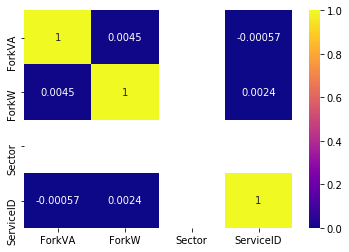

In [9]:
#plotting a correlation chart to see the relativity factor among the attributes
sns.heatmap(df.corr(), annot=True, cmap='plasma')

*** It was found that the ForkW and the Sector attributes have weak relationship with the type attribute that we are trying to predict ***

In [10]:
#creating varibales to fit in the predictive model
df = df.drop(['ForkW', 'Sector'], 1)
X = df.drop(['Type'], 1)
y = df['Type']

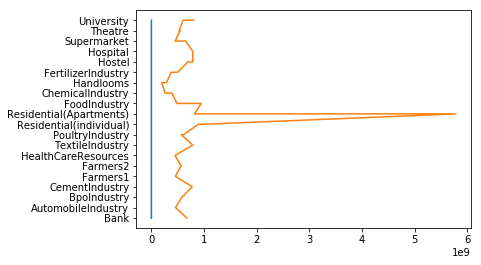

In [11]:
plt.plot(X,y)

In [12]:
#creating a train and test varible set
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 20)

In [13]:
#applying the algorithm
from xgboost import XGBClassifier as xgbc
clf = xgbc()
clf.fit(train_x, train_y)
print(100*(accuracy_score(clf.predict(test_x), test_y)))

100.0
